In [1]:
%matplotlib inline

import h5py
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

plt.style.use('ggplot')

In [2]:
train_identities = []
with open(f"../data/market1501_train.csv", "r") as f:
    for line in f:
        train_identities.append(line.split(",")[0])
train_identities = np.array(train_identities)

test_identities = []
with open(f"../data/market1501_test.csv", "r") as f:
    for line in f:
        test_identities.append(line.split(",")[0])
test_identities = np.array(test_identities)

len(set(train_identities.tolist()) & set(test_identities.tolist()))

0

In [3]:
splits = ["train", "test"]
epochs = range(0, 25000+1, 5000)
sim = {s: [] for s in splits}
for split in splits:
    print(f"Split: {split}")
    identities = []
    with open(f"../data/market1501_{split}.csv", "r") as f:
        for line in f:
            identities.append(line.split(",")[0])
    identities = np.array(identities)
    unique_ids = set(identities.tolist())
    ids = []
    for i in set(identities.tolist()):
        if i == '-1':
            continue
        ids.append(np.where(identities == i)[0])
    print(f"# of identities: {len(ids)}")

    for epoch in epochs:
        with h5py.File(f"../experiments/finetune/market1501_{split}_embeddings_{epoch}.h5", "r") as f:
            # print(f.keys())
            data = np.vstack(list(f['emb']))

        tmp = []
        for i in ids:
            tmp.append(np.ma.masked_values(np.triu(cosine_similarity(data[i,:]), k=1), 0).mean())
        sim[split].append(np.array(tmp))

Split: train
# of identities: 751
Split: test
# of identities: 751


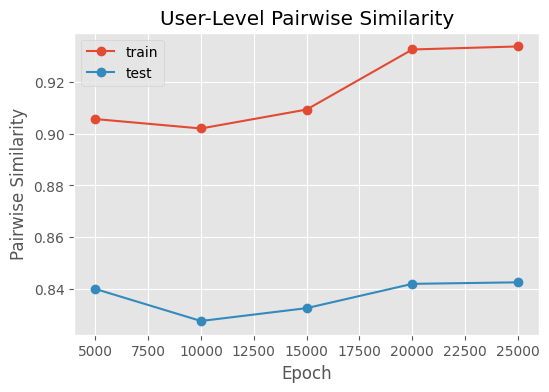

In [4]:
plt.figure(dpi=100)
for ss in sim.values():
    plt.plot(epochs[1:], [s.mean() for s in ss[1:]], "-o")
plt.title("User-Level Pairwise Similarity")
plt.xlabel("Epoch")
plt.ylabel("Pairwise Similarity")
plt.legend(sim.keys())
plt.show()